In [1]:
import ugradio
import numpy as np

import ugradio.pico as pico
import ugradio.dft as dft
import ugradio.doppler as doppler

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

In [5]:
#horn_data_1V = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nblocks=100)

In [6]:
ugradio.pico.capture_data??

In [6]:
#horn_data_50mV = ugradio.pico.capture_data('50mV', divisor=1, dual_mode=True, nblocks=100)

In [16]:
#np.savez("Horn Data 1V Range",horn_data_1V)

In [17]:
#np.savez("Horn Data 50mV Range",horn_data_50mV)

In [2]:
#horn_data_1V_water = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nblocks=100)

In [3]:
#horn_data_50mV_water = ugradio.pico.capture_data('50mV', divisor=1, dual_mode=True, nblocks=100)

In [4]:
#np.savez("Horn Data W Water 1V Range",horn_data_1V_water)

In [5]:
#np.savez("Horn Data W Water 50mV Range",horn_data_50mV_water)

In [2]:
correct_data = np.load('../Data/Horn Data 50mV Range.npz')

In [3]:
correct_water_data = np.load('../Data/Horn Data W Water 50mV Range.npz')

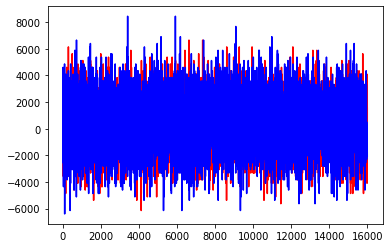

In [4]:
plt.plot(correct_data["arr_0"][0][0], "r")
plt.plot(correct_water_data["arr_0"][0][0], "b")

In [18]:
data1 = correct_data["arr_0"][0][0]
data2 = correct_data["arr_0"][0][2]

In [5]:
hist = np.histogram(correct_data["arr_0"][0][0])

In [6]:
hist[0:10]

(array([  16,  158,  823, 2359, 4115, 4372, 2753, 1102,  262,   40]),
 array([-6144., -4864., -3584., -2304., -1024.,   256.,  1536.,  2816.,
         4096.,  5376.,  6656.]))

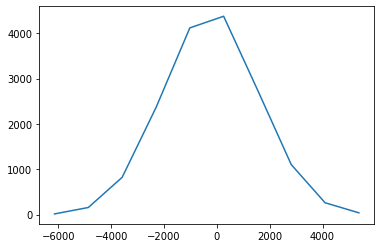

In [7]:
plt.plot(hist[1][:10], hist[0])

In [8]:
#plt.plot(hist[0].ravel())

In [24]:
freq = np.fft.fftfreq(16000, 1/62.5e6)/(1e6)
freq_shift = np.fft.fftshift(freq)

In [25]:
ft = np.fft.fft(data1)
power = abs(ft)**2
power_shift = np.fft.fftshift(power)

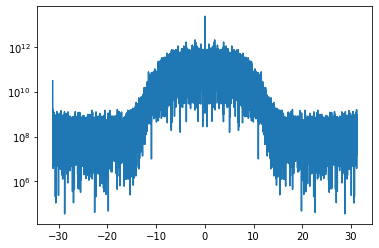

In [27]:
plt.semilogy(freq_shift, power_shift)
#needs to be averaged

In [31]:
blocks = 100
avg = []
for n in range (0,blocks):
    data_new = correct_data["arr_0"][0][n]
    avg.append(data_new)
    
avg_array = np.mean(avg, axis=0)

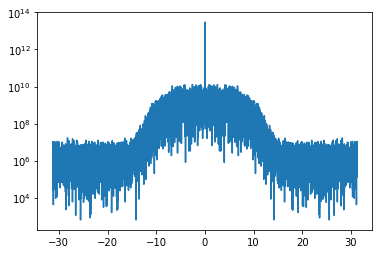

In [32]:
ft_avg = np.fft.fft(avg_array)
power_avg = abs(ft_avg)**2
power_shift_avg = np.fft.fftshift(power_avg)
plt.semilogy(freq_shift, power_shift_avg)